In [223]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [224]:
df=pd.read_csv('dataset/spam.csv',encoding='latin-1')
df.sample(10)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1655,ham,At 7 we will go ok na.,NaN,NaN,NaN
1310,ham,"I.ll always be there, even if its just in spir...",NaN,NaN,NaN
3936,ham,"Yeah, in fact he just asked if we needed anyth...",NaN,NaN,NaN
1488,ham,Tell them no need to investigate about me anyw...,NaN,NaN,NaN
636,ham,"Sweetheart, hope you are not having that kind ...",NaN,NaN,NaN
2434,ham,Uncle boye. I need movies oh. Guide me. Plus y...,NaN,NaN,NaN
990,ham,26th OF JULY,NaN,NaN,NaN
3499,spam,Dorothy@kiefer.com (Bank of Granite issues Str...,NaN,NaN,NaN
5079,ham,\Keep ur problems in ur heart,b'coz nobody will fight for u. Only u &amp; u...,NaN,NaN
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t...",NaN,NaN,NaN


In [225]:
#total shape
df.shape

(5572, 5)

In [226]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### data cleaning
####  EDA
####  text preprocessing
#### model building
####  evaluation
#### improvement
####  web app deployment

#### ------------------------------------

### 1. Data cleaning

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [228]:
# Dropping unnecessary columns and column names are unknown
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [229]:
# change the column names
df.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [230]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df['label']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [231]:
df.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [232]:
## missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [233]:
## duplicate values
df.duplicated().sum()

np.int64(403)

In [234]:
## dropping duplicate values
df=df.drop_duplicates(keep='first')

In [235]:
print(df.shape)


(5169, 2)


In [236]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

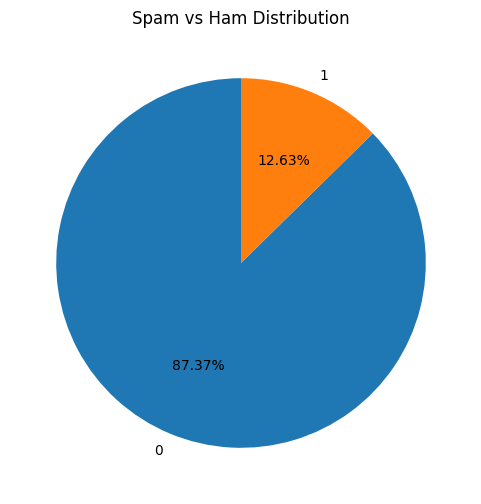

In [237]:
import matplotlib.pyplot as plt

counts = df['label'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%0.2f%%', startangle=90)
plt.title("Spam vs Ham Distribution")
plt.show()


In [238]:
import nltk

In [239]:
df['message_length']=df['message'].apply(len) ## length of messages

In [240]:
df.head()

,label,message,message_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [241]:
# no of words in each message
df['no_of_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
# df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head(5)

,label,message,message_length,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [242]:
# no of sentences in each message
df['no_of_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head(5)

,label,message,message_length,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [243]:
df[['message_length','no_of_words','no_of_sentences']].describe()

,message_length,no_of_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [244]:
# ham messages
df[df['label']==0].describe()

,label,message_length,no_of_words,no_of_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [245]:
#spam messages
df[df['label']==1].describe()

,label,message_length,no_of_words,no_of_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


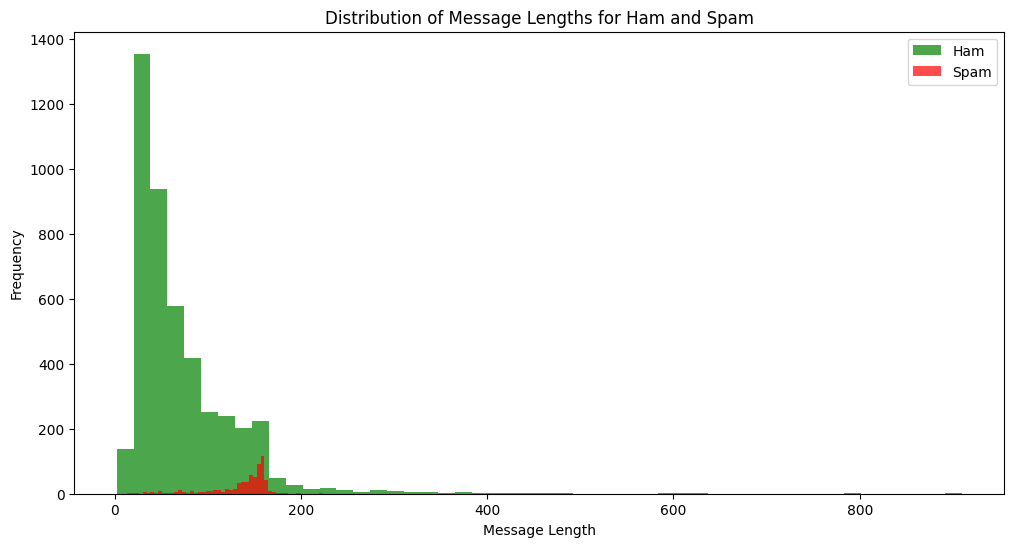

In [246]:
import seaborn as sns
plt.figure(figsize=(12,6))
plt.hist(df[df['label']==0]['message_length'], color ='green', bins=50, label='Ham', alpha=0.7)
plt.hist(df[df['label']==1]['message_length'], color='red', bins=50, label='Spam', alpha=0.7)
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Distribution of Message Lengths for Ham and Spam')
plt.legend()
plt.show()

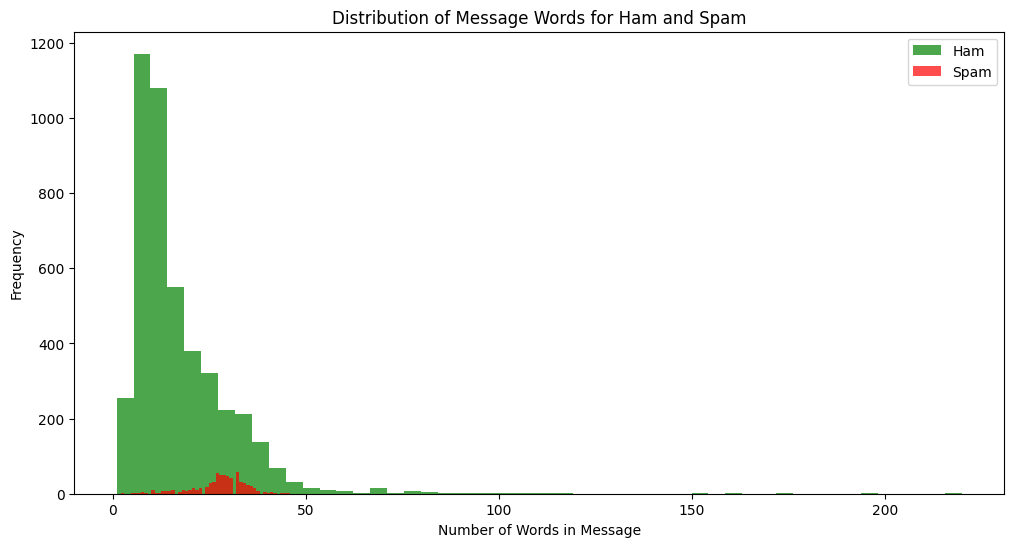

In [247]:
plt.figure(figsize=(12,6))
plt.hist(df[df['label']==0]['no_of_words'], color ='green', bins=50, label='Ham', alpha=0.7)
plt.hist(df[df['label']==1]['no_of_words'], color='red', bins=50, label='Spam', alpha=0.7)
plt.xlabel('Number of Words in Message')
plt.ylabel('Frequency')
plt.title('Distribution of Message Words for Ham and Spam')
plt.legend()
plt.show()

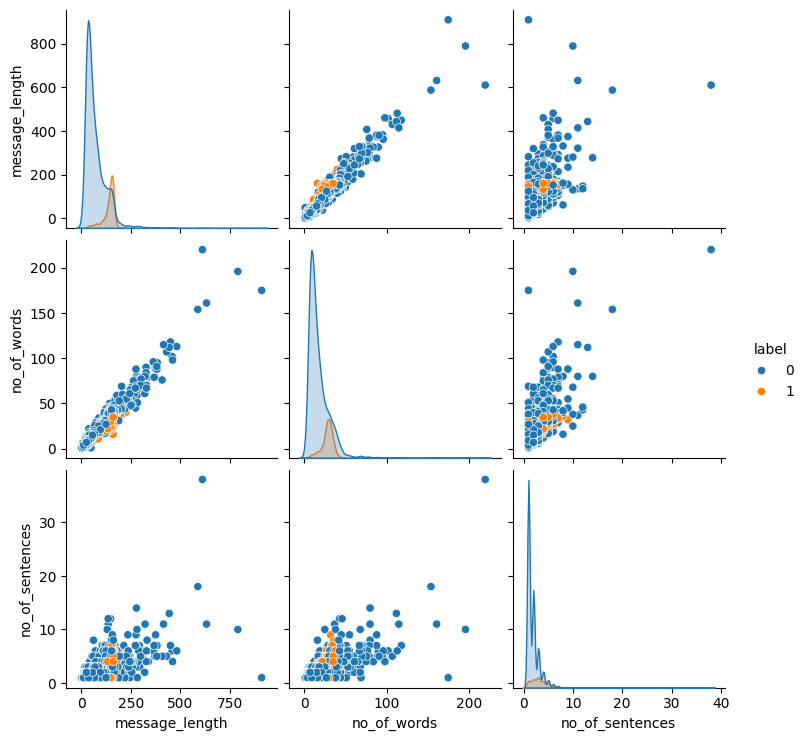

In [248]:
sns.pairplot(df,hue='label')

In [249]:
df.select_dtypes(include='number').corr()


,label,message_length,no_of_words,no_of_sentences
label,1.000000,0.384717,0.262912,0.263939
message_length,0.384717,1.000000,0.965760,0.624139
no_of_words,0.262912,0.965760,1.000000,0.679971
no_of_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

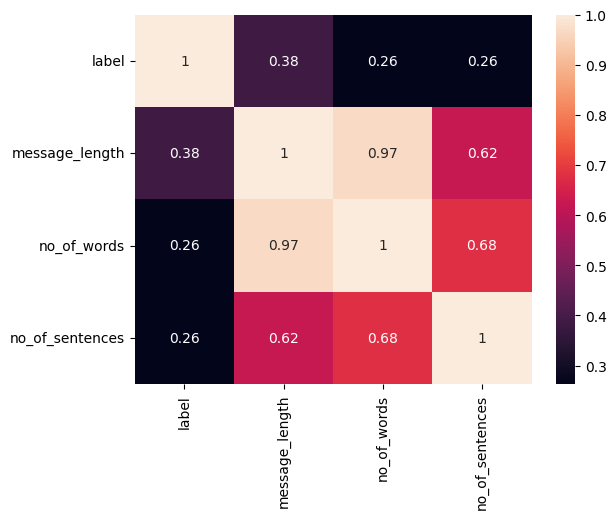

In [250]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

 #### Data preprocessing
##### l ower case
##### Tokenization
##### Remove special character
##### Remove stop words 
##### stemming

In [251]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [252]:

# %%writefile text_utils.py
def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()

    cleaned = [
        ps.stem(word)
        for word in tokens
        if word.isalnum() and word not in stop_words
    ]

    return " ".join(cleaned)


In [253]:
df['Transformed_message']=df['message'].apply(transform_text)

In [254]:
df.head()

,label,message,message_length,no_of_words,no_of_sentences,Transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


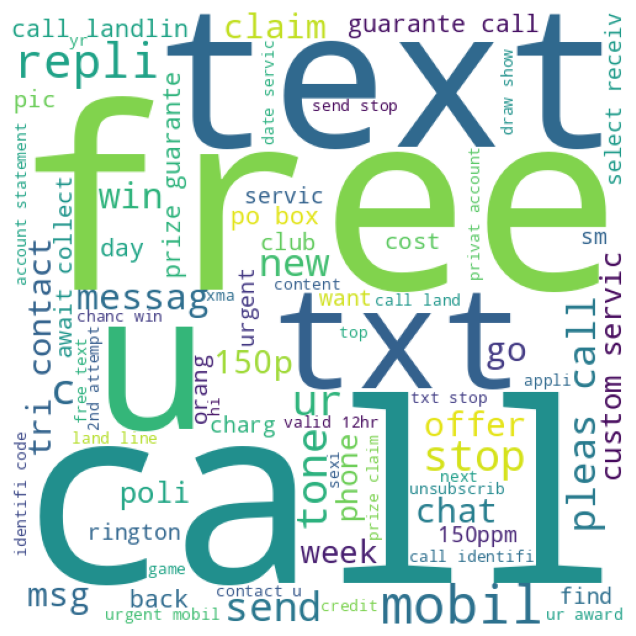

In [255]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['label'] == 1]['Transformed_message'].str.cat(sep=" "))
plt.figure(figsize=(10, 8))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

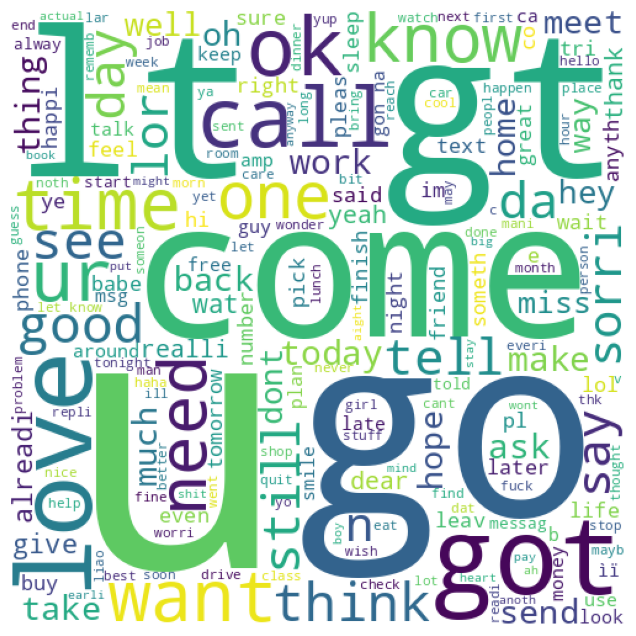

In [256]:
ham_wc = wc.generate(df[df['label'] == 0]['Transformed_message'].str.cat(sep=" "))
plt.figure(figsize=(10, 8))
plt.imshow(ham_wc)
plt.axis('off')
plt.show()
plt.show()


In [257]:
df.head()

,label,message,message_length,no_of_words,no_of_sentences,Transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [258]:
spam_corpus = []

for msg in df[df['label'] == 1]['Transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [259]:
len(spam_corpus)

9939

In [260]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

C:\Users\Pratik Giri\AppData\Local\Temp\ipykernel_16184\1505246797.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="viridis")


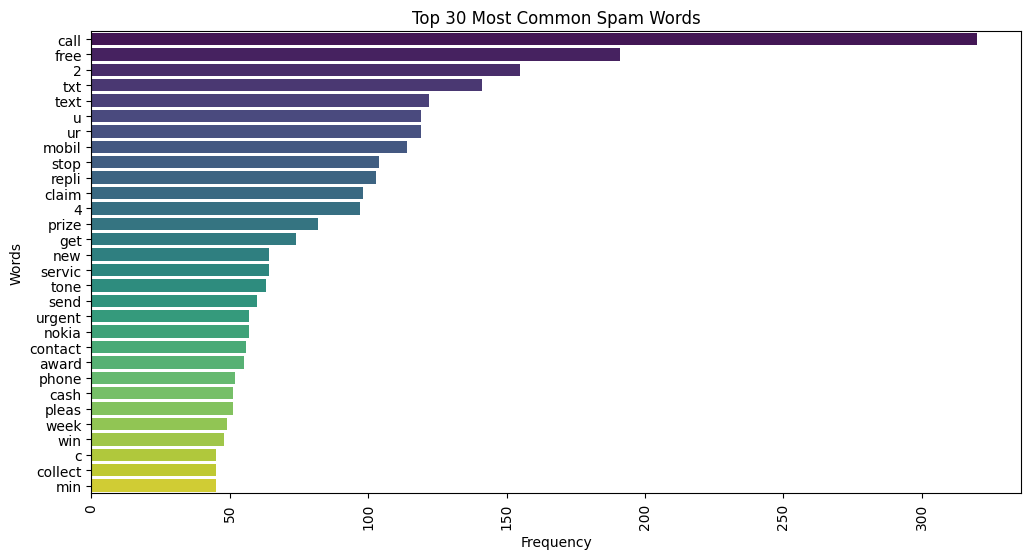

In [261]:


# Get top 30 words
common_words = Counter(spam_corpus).most_common(30)

# Separate words and counts
words = [word for word, count in common_words]
counts = [count for word, count in common_words]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=counts, y=words, palette="viridis")
plt.title("Top 30 Most Common Spam Words")
plt.xlabel("Frequency")
plt.xticks(rotation='vertical')
plt.ylabel("Words")
plt.show()


In [262]:
ham_corpus = []

for msg in df[df['label'] == 0]['Transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [263]:
len(ham_corpus)

35404

C:\Users\Pratik Giri\AppData\Local\Temp\ipykernel_16184\1008188803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


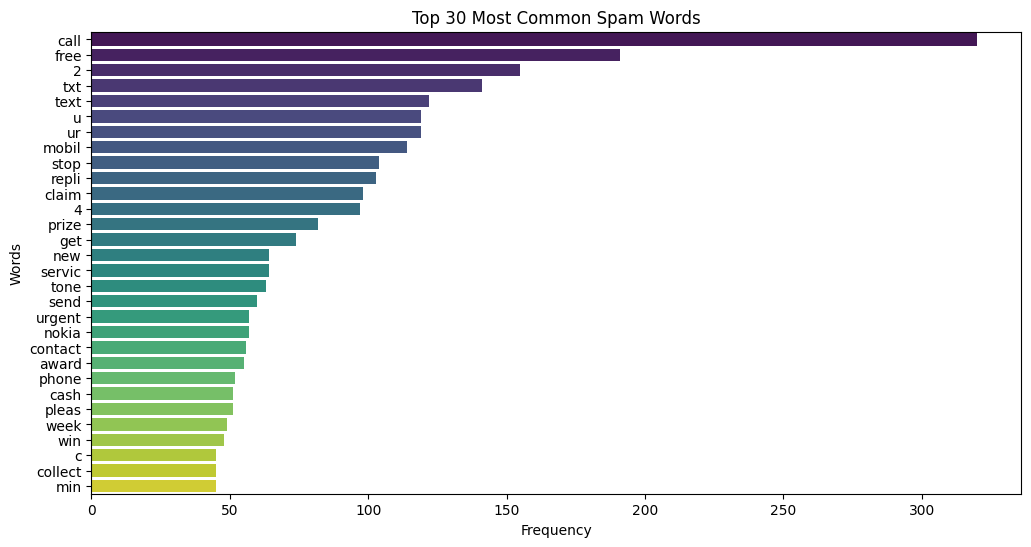

In [264]:


data = pd.DataFrame(Counter(spam_corpus).most_common(30))

plt.figure(figsize=(12,6))
sns.barplot(
    x=data[1],
    y=data[0],
    palette="viridis"
)

plt.title("Top 30 Most Common Spam Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


#### Model Building

In [265]:
df.head(2)

,label,message,message_length,no_of_words,no_of_sentences,Transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [266]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [267]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['Transformed_message']).toarray()


In [268]:
y = df['label'].values

In [269]:

from sklearn.model_selection import train_test_split

In [270]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [271]:
mnb = MultinomialNB()

In [272]:

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [273]:
mnb.predict(tfidf.transform(['Congratulations! You have won a lottery of $1000. Claim your prize now.']).toarray())

array([1])

In [274]:
y_pred = mnb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1034,))

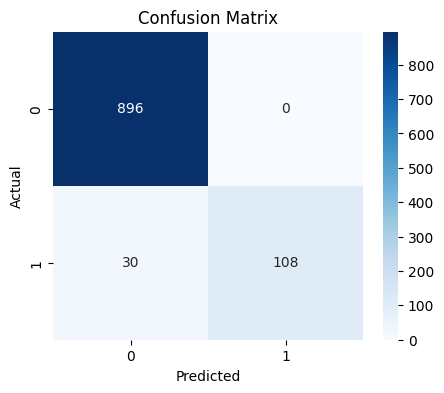

In [275]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [276]:
import pickle
# Save trained objects
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb")) 
print("✅ Model and vectorizer trained and saved")


✅ Model and vectorizer trained and saved
